In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import tqdm
import matplotlib.pyplot as plt

$\gamma$ ~ $ A | \mu - \mu_c |$

In [8]:
def compGamma(mu):
    return (1 + mu**2) / (mu + 2)

<function matplotlib.pyplot.show(close=None, block=None)>

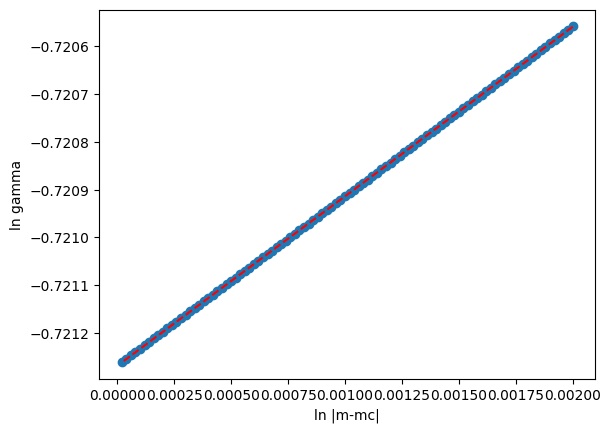

In [9]:
mc = 0.066
mStart = 0.064
n = 100

delta = (mc - mStart) / n

# approach mc from below
m = np.linspace(mStart, mc-delta, n)
mabs = np.abs(m - mc)

# calculate gamma -> xStar depending on mu
gamma = np.zeros(n)
for i in range(n):
    gamma[i] = compGamma(m[i])

x = (mabs)   
y = np.log(gamma)

# # ln gamma y axis, mc-m x axis
plt.plot(x, y, 'o')
plt.xlabel("ln |m-mc|")
plt.ylabel("ln gamma")

# # # compute regression of degree 1
coeff = np.polyfit(x, y, 1)
#print("Coeff a: ", coeff[0], "\nCoeff b: ", coeff[1])

# # # plot regression
xreg = mabs
yreg = coeff[0] * xreg + coeff[1]
plt.plot(xreg, yreg, '--r')

plt.show

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


/var/folders/gt/mfl3krb11tg0vm1rn1bxgmfh0000gn/T/ipykernel_28777/861837910.py:10: RuntimeWarning: divide by zero encountered in log
  xValues = np.log(uDelta)


LinAlgError: SVD did not converge in Linear Least Squares

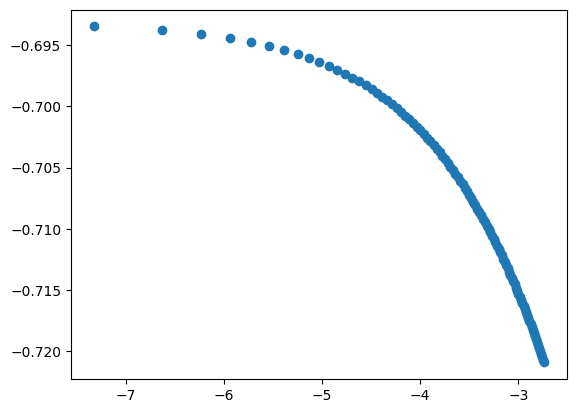

In [10]:
def macher(mu):
    #return (mu-(1/(2+mu))-(mu**2/(2+mu))+np.sqrt((5+9*mu**2+4*mu**3+mu**4)/((2+mu)**2)))
    return np.log((1 + mu**2)/(mu + 2))

uCritical = 0.066
uOffside = np.linspace(0.001,uCritical,100)
uDelta = np.abs(uOffside-uCritical)

yValues = macher(uDelta)
xValues = np.log(uDelta)

plt.plot(xValues,yValues,'o')

# regression
coeff = np.polyfit(xValues,yValues,1)
# print(coeff)
print(coeff)